In [1]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
from torch.utils.data import Dataset
import torchvision
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import os
from PIL import Image
from tqdm import tqdm
import numpy as np

In [3]:
class MyDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        sample = self.data.iloc[index].values
        return sample

In [6]:
data_path = "D:\\project\\dataset\\gen_land_marks_dataset\\FrameLM.csv"


data = pd.read_csv(data_path)
data['sign_n'] = data['sign'].astype('category').cat.codes

data

,1x0,1y0,1z0,1x1,1y1,1z1,1x2,1y2,1z2,1x3,...,2z18,2x19,2y19,2z19,2x20,2y20,2z20,frame,sign,sign_n
0,0.846833,0.902750,0.770960,0.911748,0.788044,0.827786,0.939425,0.605885,0.809260,0.953103,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15,ALL DONE,0
1,0.848541,0.922108,0.770960,0.918250,0.795534,0.855749,0.945106,0.616240,0.858329,0.955665,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15,ALL DONE,0
2,0.840546,0.927690,0.770959,0.916599,0.801719,0.829665,0.945177,0.622401,0.815006,0.954720,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15,ALL DONE,0
3,0.852944,0.927621,0.770959,0.925096,0.798189,0.874358,0.951644,0.615641,0.882257,0.962133,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15,ALL DONE,0
4,0.853046,0.926141,0.770959,0.926612,0.796678,0.884561,0.953647,0.620248,0.906087,0.964290,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15,ALL DONE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.632007,0.666757,0.948843,0.695869,0.635929,0.866754,0.749750,0.589213,0.783786,0.774926,...,-0.108612,0.679318,0.937836,-0.117675,0.686186,0.891822,-0.124076,15,THANK YOU,2
1196,0.548870,1.000000,0.948842,0.608107,0.870254,0.938450,0.653685,0.722469,0.911040,0.650712,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15,THANK YOU,2
1197,0.567080,0.790549,0.948843,0.643765,0.700862,0.869206,0.702911,0.583898,0.770457,0.723818,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15,THANK YOU,2
1198,0.552547,0.850631,0.948842,0.641923,0.782509,0.929966,0.699915,0.672363,0.866254,0.726431,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15,THANK YOU,2


In [17]:
keypints_array = data.values[:,:126]#.reshape(80, 15, 126)
lable_array = data.values[:,-1].reshape(80, 15, 1)

In [18]:
keypints_array = keypints_array.reshape(80, 15, 126)

In [24]:
lable_array_ = np.zeros(80)
for i in range(lable_array_.shape[0]):
    lable_array_[i] = lable_array[i][0][0]

In [25]:
lable_array_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [90]:
keypints_array.shape

(80, 15, 126)

In [168]:
class MyDatasetLSTM(Dataset):
    def __init__(self, data, lable):
        self.data = data.astype(np.float64)
        self.lable = lable

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, index):
        #print(self.data[index])
        return torch.tensor( self.data[index]).float(), self.lable[index]

In [169]:
#train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
dataset = MyDatasetLSTM(keypints_array, lable_array_)

#train_size = int(0.8 * len(dataset))
#val_size = len(dataset) - train_size
#t , v = random_split(dataset, [train_size, val_size])

In [134]:
len(dataset)

80

In [172]:
dataset[0]

(tensor([[ 0.8468,  0.9027,  0.7710,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.8485,  0.9221,  0.7710,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.8405,  0.9277,  0.7710,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0989,  0.9731,  0.7710,  ...,  0.9065,  0.5294, -0.0606],
         [ 0.1095,  0.9907,  0.7710,  ...,  0.9556,  0.5438, -0.0664],
         [ 0.1116,  1.0000,  0.7710,  ...,  0.9860,  0.5429, -0.0835]]),
 0.0)

In [171]:
#dataset[0]
lable_array_[0]

0.0

In [183]:

#test_dataset = MyDataset(test_data)
TrainDataLoader = DataLoader(dataset, batch_size=1)
#TestDataLoader = DataLoader(v, batch_size=64)

In [187]:
class LSTMmodel(nn.Module):
    def __init__(self, num_classes ):
        super().__init__()
        self.lstm = nn.LSTM(input_size=126, hidden_size=500, num_layers=1, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.linear = nn.Linear(500, num_classes)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.dropout(x)
        x = self.linear(x)
        return x

model = LSTMmodel(4)

In [188]:
checkpoint_path = "D:/project/asl/checkpoint_lm_LSTM.pt"

def save_model(model):
    torch.save(model.state_dict(), checkpoint_path)

In [189]:
device = torch.device('cpu' if torch.cuda.is_available() else 'cpu')

In [190]:

model.to(device)
opt_myCNN = optim.Adam(model.parameters(), lr = 0.0001)
criterion = nn.CrossEntropyLoss()
num_epochs=150

In [191]:
def validate(model, dataloader):
    #print("validate")
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    val_running_errors = 0
    #print("1")
    with torch.no_grad():
        #print("2")
        for i, data in tqdm(enumerate(dataloader), total=int(len(dataloader.dataset)/dataloader.batch_size)):
            #print(data[1].shape)
            data, labels = data[0].to(device), data[1].to(device)
            data
            outputs = model(data)
            #print(outputs)
            #print(labels)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item()* data.size(0)
            _, preds = torch.max(outputs.data, 1)
            val_running_correct += torch.sum(preds == labels)
            val_running_errors += torch.sum(preds != labels)

        val_loss = val_running_loss/len(dataloader.dataset)
        val_accuracy = val_running_correct/len(dataloader.dataset)
        val_errore = val_running_errors/len(dataloader.dataset)
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy}')
        
        return val_loss, val_accuracy, val_errore
# train part
def train(model,optimizer, dataloader):
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    train_running_errors = 0
    for i, data in tqdm(enumerate(dataloader), total=int(len(dataloader.dataset) /dataloader.batch_size)):

        data, labels = data[0].to(device), data[1].to(device)
        data =  torch.reshape(data, (15, 1, 126))
        print(data.shape)
        print(labels.shape)
        optimizer.zero_grad()
        outputs = model(data)
        print(outputs.shape)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        train_running_errors += torch.sum(preds != labels)
        train_running_correct += torch.sum(preds == labels)
        train_running_loss += loss.item()* data.size(0)
        loss.backward()
        optimizer.step()
        
    train_loss = train_running_loss/len(dataloader.dataset)
    train_accuracy = train_running_correct/len(dataloader.dataset)
    train_errore = train_running_errors/len(dataloader.dataset)

    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy}")
    return train_loss, train_accuracy, train_errore
 #  main 
def model_train(model, optimizer, train_dataloader, epochs):
  err_history = {"train" : [], "val" : []}
  acc_history =  {"train" : [], "val" : []}
  loss_history = {"train" : [], "val" : []}
  for epoch in range(epochs):
      print(f"Epoch {epoch+1} of {epochs}")
      phase = "train"
      print(phase)
      loss, accuracy, error = train(model, optimizer, train_dataloader)
      #phase = "val"
      #print(phase)
      #loss, accuracy, error = validate(model, test_dataloader)

  save_model(model)
  return err_history, acc_history, loss_history

In [192]:
myCNN_err_history, myCNN_acc_history , myCNN_loss_history = model_train(model, opt_myCNN, TrainDataLoader ,num_epochs )

Epoch 1 of 150
train


  0%|          | 0/80 [00:00<?, ?it/s]

torch.Size([15, 1, 126])
torch.Size([1])
torch.Size([15, 1, 4])


ValueError: Expected input batch_size (15) to match target batch_size (1).

In [154]:

model.eval()
print("1")
val_running_loss = 0.0
val_running_correct = 0
val_running_errors = 0
#with torch.no_grad():
for data in TestDataLoader:
    #print(data[0].shape)
    data, labels = data[0].to(device), data[1].to(device)

    outputs = model(data)
    #print(labels)
    loss = criterion(outputs, labels)

    val_running_loss += loss.item()* data.size(0)
    _, preds = torch.max(outputs.data, 1)
    #print(preds)
    val_running_correct += torch.sum(preds == labels)
    val_running_errors += torch.sum(preds != labels)

val_loss = val_running_loss/len(TestDataLoader.dataset)
val_accuracy = val_running_correct/len(TestDataLoader.dataset)
print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy}')


1


KeyError: 0

In [66]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [326]:
count = [0]*29
for e in val_loader.dataset:
    count[e[1]] +=1

In [ ]:
count

In [76]:
outputs, leble, pred  = validate_(model, _ , test_dataloader)

1


1it [00:00, 66.92it/s]

Val Loss: 8.1486, Val Acc: 0.0


In [78]:
torch.max(pred)

tensor(22, device='cuda:0')

In [70]:
def plot_confusion_matrix(cm, 
                      normalized=False, 
                      title=None, 
                      cmap=plt.cm.Blues,
                      size=(16,12)):
    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

In [71]:
cm = confusion_matrix(pred.to("cpu"), leble.to("cpu"))

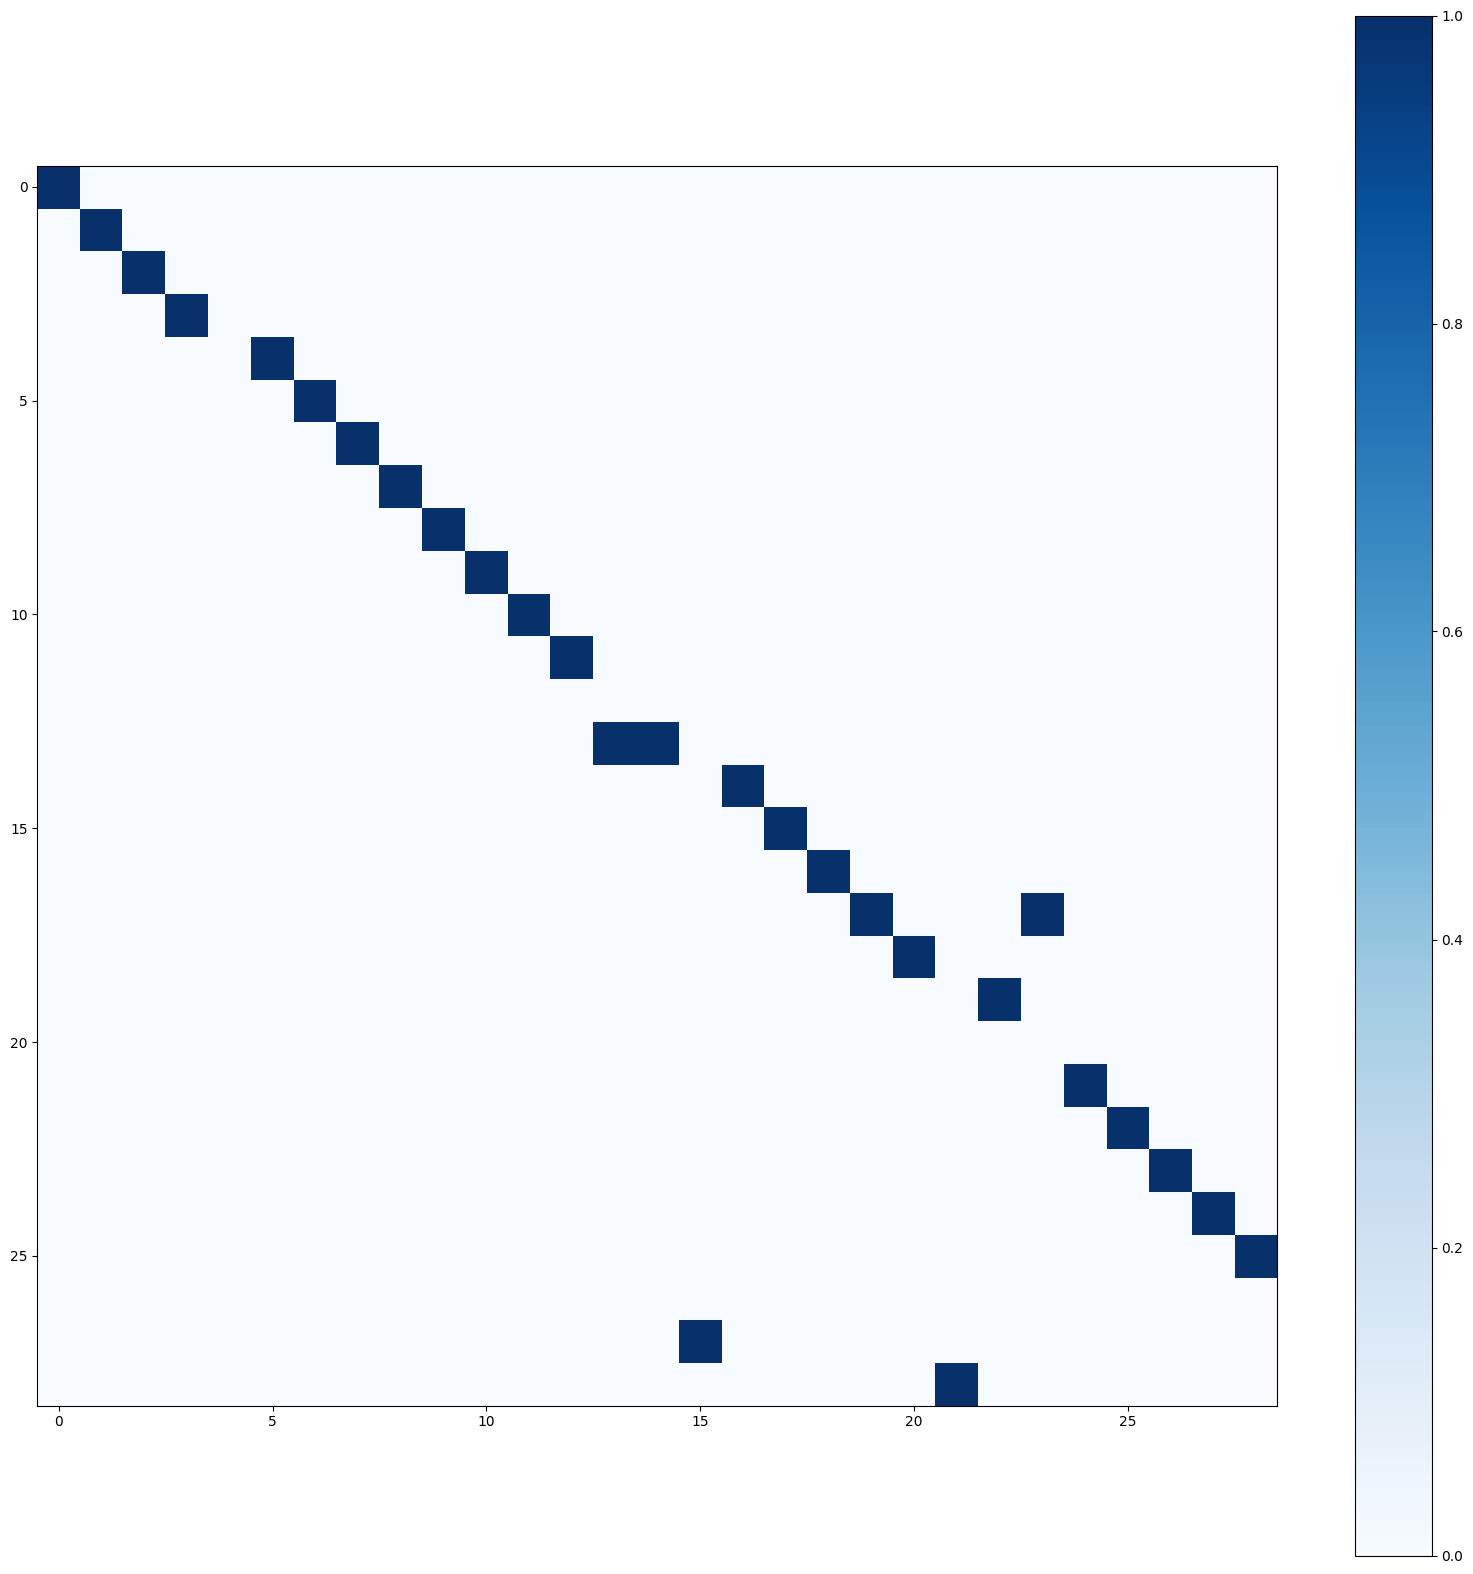

In [72]:
plot_confusion_matrix(cm,
                      normalized=True, 
                      title="Model Performance", 
                      cmap=plt.cm.Blues,
                      size=(20, 20))

In [312]:
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 

In [231]:
model_test = SimpleCNN(29)

In [142]:
saved_state_dict = torch.load(checkpoint_path)

model_test.load_state_dict(saved_state_dict)
model_test.to(device)

SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=29, bias=True)
  )
)

In [185]:
len(train_data_loader.dataset)

87000

In [342]:
out, lab, preds =  validate_(model, "8" ,test_dataloader)

1


1it [00:00,  6.56it/s]

Val Loss: 3.3891, Val Acc: 0.0357142873108387


In [343]:
preds

tensor([28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
        28, 28, 28, 28, 28, 28, 28, 28, 28, 28], device='cuda:0')

In [344]:
lab

tensor([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 14, 16, 17, 18,
        19, 21, 20, 22, 23, 24, 25, 26, 27, 28], device='cuda:0')

In [168]:
test_dataset[:,0]

IndexError: too many indices for tensor of dimension 1

In [176]:
out_R  =model_test(images_t.to(device))
loss = criterion(out_R, lables_t.to(device))

In [180]:
out_R

tensor([[  25.1246,  -17.7779,  -30.0222,  -46.3044,  -13.8914,  -13.6885,
          -33.4458,  -59.6534,  -17.4975,  -46.3703,  -45.5736,   -0.7717,
          -10.1311,  -16.1549,   -4.7489,  -39.6303,  -25.6147,  -51.9624,
            8.8614,   27.1093,  -26.5826,  -34.8662,  -16.8425,   10.4190,
            0.4968,   -6.2862,  -45.1497,   -7.3668,  -32.7714],
        [  -3.4972,   31.2964,  -28.4469,   -3.5423,   19.0190,  -17.2941,
          -26.2976,  -15.2658,    5.8858,  -37.4065,  -36.9119,  -33.4379,
          -15.3079,  -18.1010,  -20.4883,  -24.0730,  -25.1254,  -32.8994,
           -3.7259,  -26.4858,  -11.4578,  -49.4884,  -27.8632,  -28.3417,
          -25.3667,  -53.3120,  -26.9595,   -9.6482,  -48.6743],
        [ -37.7241,  -78.8876,   92.2101,   29.9073,    7.8852,  -19.0678,
          -12.7656,  -54.3811,  -25.9852,  -99.3926, -131.8276,  -40.5023,
          -76.2138,  -68.5968,   17.5785,  -41.7020,    5.9910, -155.1064,
           -2.1584,  -23.8685, -105.0168, -13

In [186]:
_, preds = torch.max(out_R.data, 1)

In [187]:
_

tensor([ 27.1093,  31.2964,  92.2101,  57.4406,  38.3035, 124.1692,  50.7408,
         67.6636,  45.2949,  37.1401,  25.1132,  33.7056,  26.8946,  21.5302,
         46.9998,  51.6844,  68.3438,  59.0578,   5.4448,  16.1544,  19.0294,
         35.4986,  25.2949,  20.5789,  47.1341,  14.0050,  31.2637,  24.2863],
       device='cuda:0')

In [188]:
preds

tensor([19,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 27, 13, 14, 15, 16,
        17, 28, 18, 19, 20, 21, 22, 23, 24, 25], device='cuda:0')

In [189]:
lables_t

tensor([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 14, 16, 17, 18,
        19, 21, 20, 22, 23, 24, 25, 26, 27, 28])

In [177]:
loss

tensor(45.9709, device='cuda:0', grad_fn=<NllLossBackward0>)